In [3]:
from keras.layers import Input,Dense
from keras.models import Model
import numpy as np
path=r'C:\Users\HAMROUA\Desktop\Aymen\KingsCollege\\'



Nredundant=1

rows=[]
FinalData=[]
with open(path+'dataset.csv') as f:
    for line in f:
        # strip whitespace
        line = line.strip()
        # separate the columns
        line = line.split(',')
        # save the line for use later
        rows.append(line)
for i in range(0,len(rows)*4//5):
    Time=np.reshape([float(rows[i][1])], ( 1, 1))
    X= np.reshape([float(rows[i][2])], (1, 1))
    Y= np.reshape([float(rows[i][3])], (1,1))
    Z= np.reshape([float(rows[i][4])], (1,1))
    W= np.reshape([float(rows[i][5])], (1,1))
    P= np.reshape([float(rows[i][6])], (1,1))
    Q= np.reshape([float(rows[i][7])], (1,1))
    R= np.reshape([float(rows[i][8])], (1,1))
    Data= np.concatenate((Time,X,Y,Z,W,P,Q,R), axis=1)
    FinalData.append(Data)

    
X_train = np.reshape(FinalData, (len(FinalData), 8))

FinalData=[]
for i in range(len(rows)*4//5,len(rows)):
    Time=np.reshape([float(rows[i][1])], ( 1, 1))
    X= np.reshape([float(rows[i][2])], (1, 1))
    Y= np.reshape([float(rows[i][3])], (1,1))
    Z= np.reshape([float(rows[i][4])], (1,1))
    W= np.reshape([float(rows[i][5])], (1,1))
    P= np.reshape([float(rows[i][6])], (1,1))
    Q= np.reshape([float(rows[i][7])], (1,1))
    R= np.reshape([float(rows[i][8])], (1,1))
    Data= np.concatenate((Time,X,Y,Z,W,P,Q,R), axis=1)
    FinalData.append(Data)

X_test = np.reshape(FinalData, (len(FinalData), 8))




In [4]:
print(X_test.shape)
print(X_train.shape)

(312, 8)
(1248, 8)


In [5]:


# number of neurons in the encoding hidden layer
encoding_dim = 6
# input placeholder
input_data = Input(shape=(8,)) # 6 is the number of features/columns
# encoder is the encoded representation of the input
encoded = Dense(7, activation ='tanh')(input_data)

encoded = Dense(6, activation ='tanh')(encoded)

encoded = Dense(encoding_dim, activation ='tanh')(encoded)

# decoder is the lossy reconstruction of the input
decoded = Dense(8, activation ='sigmoid')(encoded) # 6 again number of features and should match input_data


# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)




# this model maps an input to its encoded representation
encoder = Model(input_data, encoded)
# model optimizer and loss
autoencoder = Model(input_data, decoded)

# loss function and optimizer
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# train test split
autoencoder.summary()


# train the model
autoencoder.fit(X_train,
                X_train,
                epochs=200,
                batch_size=10,
                shuffle=True)


# predict after training
# note that we take them from the *test* set
encoded_data = encoder.predict(X_test)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 7)                 63        
                                                                 
 dense_1 (Dense)             (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 8)                 56        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
125/125 [==============================] - 2s 3ms

125/125 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 87/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 88/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 89/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 90/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 91/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 92/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 93/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 94/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 95/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 96/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 97/200
125/125 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 98/200
125/

125/125 [==============================] - 0s 3ms/step - loss: 8.2893e-04
Epoch 184/200
125/125 [==============================] - 0s 3ms/step - loss: 8.2199e-04
Epoch 185/200
125/125 [==============================] - 0s 3ms/step - loss: 8.1537e-04
Epoch 186/200
125/125 [==============================] - 0s 3ms/step - loss: 8.0353e-04
Epoch 187/200
125/125 [==============================] - 0s 3ms/step - loss: 7.9935e-04
Epoch 188/200
125/125 [==============================] - 0s 3ms/step - loss: 8.0045e-04
Epoch 189/200
125/125 [==============================] - 0s 3ms/step - loss: 7.8523e-04
Epoch 190/200
125/125 [==============================] - 0s 3ms/step - loss: 7.7675e-04
Epoch 191/200
125/125 [==============================] - 0s 3ms/step - loss: 7.7454e-04
Epoch 192/200
125/125 [==============================] - 0s 3ms/step - loss: 7.6828e-04
Epoch 193/200
125/125 [==============================] - 0s 3ms/step - loss: 7.6495e-04
Epoch 194/200
125/125 [=======================

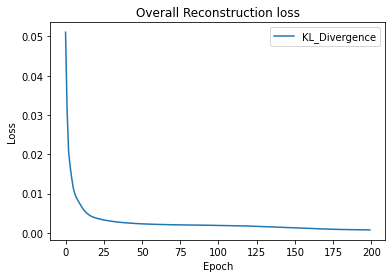

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'])
plt.title('Overall Reconstruction loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['KL_Divergence'], loc='upper right')
plt.show()


In [91]:



encoded_data = encoder.predict(X_test)
print(encoded_data[0])
X_result=autoencoder.predict(X_test)
print(sum(abs(X_result-X_test)))
print(sum(sum(abs(X_result-X_test)))/(X_test.shape[0]*X_test.shape[1])*100)


[-0.5329782   0.09703619 -0.60956806 -0.5894097  -0.19915487 -0.7099743 ]
[15.94194669  7.4965435   6.35142717  3.6639548   4.7408941  17.81470729
  6.39967977  8.31278937]
2.8334111651816265


In [92]:
finalSet={}
encoded_data = encoder.predict(X_train)

for i in range(0,len(rows)*4//5):
    finalSet[rows[i][0]]=encoded_data[i]

encoded_data = encoder.predict(X_test)

for i in range(len(rows)*4//5,len(rows)):
    finalSet[rows[i][0]]=encoded_data[i-len(rows)*4//5]
          
            
    
import csv
import pandas as pd

(pd.DataFrame.from_dict(data=finalSet, orient='index')
   .to_csv('C:\\Users\\HAMROUA\\Desktop\\KingsCollege\\dataset_features.csv', header=False))
        
      